# Installs and Imports

In [1]:
!pip install torch_scatter
!pip install torch_geometric
!pip install epilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch_scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=301409 sha256=b5ed3d5fd5372fad10e671eafe614c36dc346a5fdf5e5578c5099bb6e92467a1
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch_scatter

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.3/287.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.6/206.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333

In [2]:
import torch
import torch_geometric
import epilearn

import numpy as np
import pandas as pd

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Processing

In [906]:
# Define the URL of the CSVs we will be working with
world_population_URL = "https://github.com/anay15/Table-Population/raw/refs/heads/main/population_by_country_2020.csv"
time_series_cases_URL = "https://github.com/CSSEGISandData/COVID-19/raw/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [907]:
# Load the CSVs into DataFrames and preview them (1)
raw_world_pop_df = pd.read_csv(world_population_URL)
raw_cases_df = pd.read_csv(time_series_cases_URL)
raw_cases_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [908]:
# Load the CSVs into DataFrames and preview them (2)
raw_world_pop_df.head(5)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1382345085,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331341050,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,274021604,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,221612785,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%


In [909]:
cases_df = raw_cases_df.drop(columns=["Province/State"])

In [910]:
world_pop_df = raw_world_pop_df.drop(columns=["Yearly Change", "Net Change", "Density (P/Km²)", "Land Area (Km²)", "Migrants (net)", "Fert. Rate", "Med. Age", "Urban Pop %", "World Share"])

In [911]:
world_pop_df = world_pop_df.rename(columns={"Country (or dependency)" : "Country/Region"})

In [912]:
world_pop_df = world_pop_df.drop_duplicates(subset=["Country/Region"])
cases_df = cases_df.drop_duplicates(subset=["Country/Region"])

In [913]:
cases_df.shape, world_pop_df.shape

((201, 1146), (235, 2))

In [914]:
merged_df = pd.merge(cases_df, world_pop_df, how="inner", on="Country/Region")
merged_df.head(5)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Population (2020)
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,39074280
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,2877239
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,43984569
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,77287
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,33032075


In [915]:
cases_df = merged_df.copy()
world_pop_df = merged_df.copy()

cases_df = cases_df.drop(columns=["Country/Region", "Population (2020)"])
world_pop_df = world_pop_df[['Population (2020)']]

In [916]:
# Create a random sampling of cases.
sampled_indices = cases_df.sample(n=40, random_state=42).index
cases_sampled = cases_df.loc[sampled_indices]
world_pop_sampled = world_pop_df.loc[sampled_indices]

In [917]:
cases_sampled.shape, world_pop_sampled.shape

((40, 1145), (40, 1))

In [918]:
cases = cases_sampled.to_numpy()
population = world_pop_sampled.to_numpy()

# Ensure the population count is repeat for each time step that exists in the cases array
population = np.repeat(population, cases.shape[1], axis=-1) # repeat population values 1145 times along the -1 axis

cases.shape, population.shape

((40, 1145), (40, 1145))

In [919]:
I_frac = cases / population # shape = (num_nodes, num_steps, num_features)
E_frac = np.zeros_like(I_frac)
R_frac = np.zeros_like(I_frac)

E_frac.shape, R_frac.shape

((40, 1145), (40, 1145))

In [920]:
INCUBATION_PERIOD = 7
INFECTIOUS_PERIOD = 14

steps = 1145

# Must step through timesteps to estimate time-shifts for INCUBATION_PERIOD and INFECTIOUS_PERIOD
for step in range(steps):
    incubation_shift = step + INCUBATION_PERIOD # Exposed at t were infected 7 days earlier
    recovery_shift = step - INFECTIOUS_PERIOD # Recovered at t were infected at least 14 days earlier

    if incubation_shift < steps: # Prevent out of bounds indexing
        E_frac[:, step] = cases[:, incubation_shift] / population[:, 0] # At any given time step, the number of people exposed is equal to the number of cases at time step + INCUBATION_PERIOD within the cases array

    if recovery_shift >= 0: # Prevent out of bounds indexing
        R_frac[:, step] = cases[:, recovery_shift] / population[:, 0] # Any any given time step, the number of people recovered is equal to the number of cases at time step - INFECTIOUS_PERIOD within the cases array

E_frac.shape, R_frac.shape

((40, 1145), (40, 1145))

In [921]:
# Ensure the values of each are a fraction of 1 (based on population)

S_frac = 1 - I_frac - E_frac - R_frac

In [922]:
# Sum random fractions to confirm they total to 1

import random
rand_idx = random.randint(0, 1144)

total_pop = I_frac[0, rand_idx] + E_frac[0, rand_idx] + R_frac[0, rand_idx] + S_frac[0, rand_idx]

f"Correct fractions at timestep {rand_idx+1}" if total_pop == 1 else f"Incorrect fractions at timestep {rand_idx+1}"

'Correct fractions at timestep 463'

In [923]:
data = np.stack([S_frac, E_frac, I_frac, R_frac])
data = data.transpose(2,1,0)
data.shape

(1145, 40, 4)

In [924]:
data = torch.tensor(data, dtype=torch.float32).unsqueeze(0)
data.shape

torch.Size([1, 1145, 40, 4])

# Define Model

* **

### **SEIRS legend:**
* S(t): number of Susceptible
* E(t): number of Exposed
* I(t): Number of Infected
* R(t): Number of Recovered
* N = S + E + I + R: Total Population
* 𝛽 — Beta: Infection Rate
* σ — Sigma: Incubation Rate ... = 1 / incubation period
* γ — Gamma: Recovery Rate ... = 1 / infectious period
* 𝜔 — Omega: Immunity Loss Rate ... = 1 / immunity duration

* **

### **SEIRS formulae:**
* Susceptible:
  * *dt_dS = -β ⋅ S⋅I/N + ω⋅R*
  * *new_susceptible = -beta * (susceptible * infected / population) + (omega * recovered)*
  * **Loses people to infection**
  * **Gains people whose immunity wore off**
* Exposed:
  * *dt_dE = β ⋅ S⋅I/N - σ⋅E*
  * new_exposed = beta * (susceptible * infected / population) - (sigma * exposed)
  * **Gains new infections**
  * **Loses to infectious stage after incubation**
* Infected:
  * *dt_dI = σ⋅E - γ⋅I*
  * *new_infected = sigma * exposed - gamma * infected*
  * **Gains from exposed becoming sick**
  * **Loses to recovery**
* Recovered:
  * *dt_dR = γ⋅I - ω⋅R*
  * *new_recovered = gamma * infected - omega * recovered*
  * **Gains from people recovering**
  * **Loses immunity after some time**

* **

### **Other notes:**
 * The `beta`, `sigma`, `gamma`, and `omega` parameters will be trainable weights within the PyTorch model
 * For the purposes of this project, we will assume the following:
  * `infectious_period` = 7 days --> 1/7
  * `incubation_period` = 14 days --> 1/14
  * `immunity_duration` = 14 days --> 1/14

In [925]:
class NetSEIRS(epilearn.models.SpatialTemporal.base.BaseModel):
    def __init__(self,
                num_nodes,
                num_features,
                horizon,
                adj,
                infection_rate, # transmission_rate; beta
                incubation_rate, # sigma
                recovery_rate, # gamma
                immunity_loss_rate, # omega
                device,
                batch_size,
                **kwargs):
        super(NetSEIRS, self).__init__()

        # Define hyperparameters
        self.num_nodes = num_nodes
        self.num_features = num_features
        self.horizon = horizon
        self.adj = adj.float().to("cpu")
        self.batch_size = batch_size
        self.device = device

        # Define the trainable parameters
        self.beta = torch.abs(torch.zeros(num_nodes))
        self.beta = torch.nn.Parameter(torch.full_like(self.beta, infection_rate))

        self.sigma = torch.abs(torch.zeros(num_nodes))
        self.sigma = torch.nn.Parameter(torch.full_like(self.sigma, incubation_rate))

        self.gamma = torch.abs(torch.zeros(num_nodes))
        self.gamma = torch.nn.Parameter(torch.full_like(self.gamma, recovery_rate))

        self.omega = torch.abs(torch.zeros(num_nodes))
        self.omega = torch.nn.Parameter(torch.full_like(self.omega, immunity_loss_rate))
        
    def forward(self, x,
            graph=None,
            states=None,
            dynamic_graph=None,
            batch_size=None,
            **kwargs):
        
        x = x.to(self.device)

        future_steps = []

        current_state = x[:, -1, :, :]

        for step in range(self.horizon):
            # Append current_state to future_steps
            future_steps.append(current_state)
            
            # Get current_step states
            S_prev = current_state[...,0]
            E_prev = current_state[...,1]
            I_prev = current_state[...,2]
            R_prev = current_state[...,3]

            #-----------------------------
            #print(f"\n\n\nTEST: Shape of I_prev: {I_prev.shape}")
            #print(f"TEST: Shape of adj: {self.adj.shape}")
            #-----------------------------
            
            # Get infected_rate from adjacency matrix multiplication
            infected_neighbours = torch.matmul(self.adj, I_prev.T).T

            #-----------------------------
            #print(f"TEST: Shape of infected: {infected.shape}\n\n\n")
            #-----------------------------

            # Apply formulae
            S = -self.beta * ((S_prev * infected_neighbours) + (self.omega * R_prev))
            E = self.beta * (S_prev * infected_neighbours) - (self.sigma * E_prev)
            I = self.sigma * E_prev - self.gamma * I_prev
            R = self.gamma * I_prev - self.omega * R_prev
            
            # Get next step by adding current_step with new values
            S_next = (S + S_prev).clamp(0.0, 1.0)
            E_next = (E + E_prev).clamp(0.0, 1.0)
            I_next = (I + I_prev).clamp(0.0, 1.0)
            R_next = (R + R_prev).clamp(0.0, 1.0)
           
            # Append to current_state
            current_state = torch.stack([S_next, E_next, I_next, R_next], -1)

        output = torch.stack(future_steps, 1)
        return output

    def initialize(self):
        pass

In [926]:
population

array([[  773069,   773069,   773069, ...,   773069,   773069,   773069],
       [ 5795780,  5795780,  5795780, ...,  5795780,  5795780,  5795780],
       [21428970, 21428970, 21428970, ..., 21428970, 21428970, 21428970],
       ...,
       [13191279, 13191279, 13191279, ..., 13191279, 13191279, 13191279],
       [  787215,   787215,   787215, ...,   787215,   787215,   787215],
       [37799407, 37799407, 37799407, ..., 37799407, 37799407, 37799407]])

In [927]:
initial_state = data
initial_graph = epilearn.utils.simulation.get_random_graph(num_nodes=40,
                                                            connect_prob=0.40)

initial_state.shape, initial_graph.shape

(torch.Size([1, 1145, 40, 4]), torch.Size([40, 40]))

In [928]:
model = NetSEIRS(num_nodes=40, 
                num_features=4,
                horizon=30,
                adj=initial_graph,
                infection_rate=0.2,
                incubation_rate=1/INCUBATION_PERIOD, 
                recovery_rate=1/INFECTIOUS_PERIOD, 
                immunity_loss_rate=1/7,
                device="cpu",
                batch_size=1)

In [929]:
prediction = model(initial_state)
prediction.shape

torch.Size([1, 30, 40, 4])

In [930]:
prediction

tensor([[[[0.8380, 0.0000, 0.0810, 0.0810],
          [0.9880, 0.0000, 0.0060, 0.0060],
          [0.9373, 0.0000, 0.0314, 0.0314],
          ...,
          [0.9942, 0.0000, 0.0029, 0.0029],
          [0.8144, 0.0000, 0.0928, 0.0928],
          [0.9667, 0.0000, 0.0166, 0.0166]],

         [[0.4037, 0.4320, 0.0752, 0.0752],
          [0.4930, 0.4948, 0.0056, 0.0056],
          [0.2901, 0.6463, 0.0291, 0.0291],
          ...,
          [0.6935, 0.3006, 0.0027, 0.0027],
          [0.1243, 0.6874, 0.0862, 0.0862],
          [0.5660, 0.4002, 0.0155, 0.0154]],

         [[0.2083, 0.5635, 0.1316, 0.0698],
          [0.2636, 0.6534, 0.0758, 0.0052],
          [0.1035, 0.7397, 0.1194, 0.0270],
          ...,
          [0.4987, 0.4524, 0.0454, 0.0025],
          [0.0244, 0.6866, 0.1782, 0.0800],
          [0.3480, 0.5607, 0.0715, 0.0143]],

         ...,

         [[0.0000, 0.0174, 0.2336, 0.1612],
          [0.0000, 0.0210, 0.2673, 0.1804],
          [0.0000, 0.0183, 0.2492, 0.1715],
          

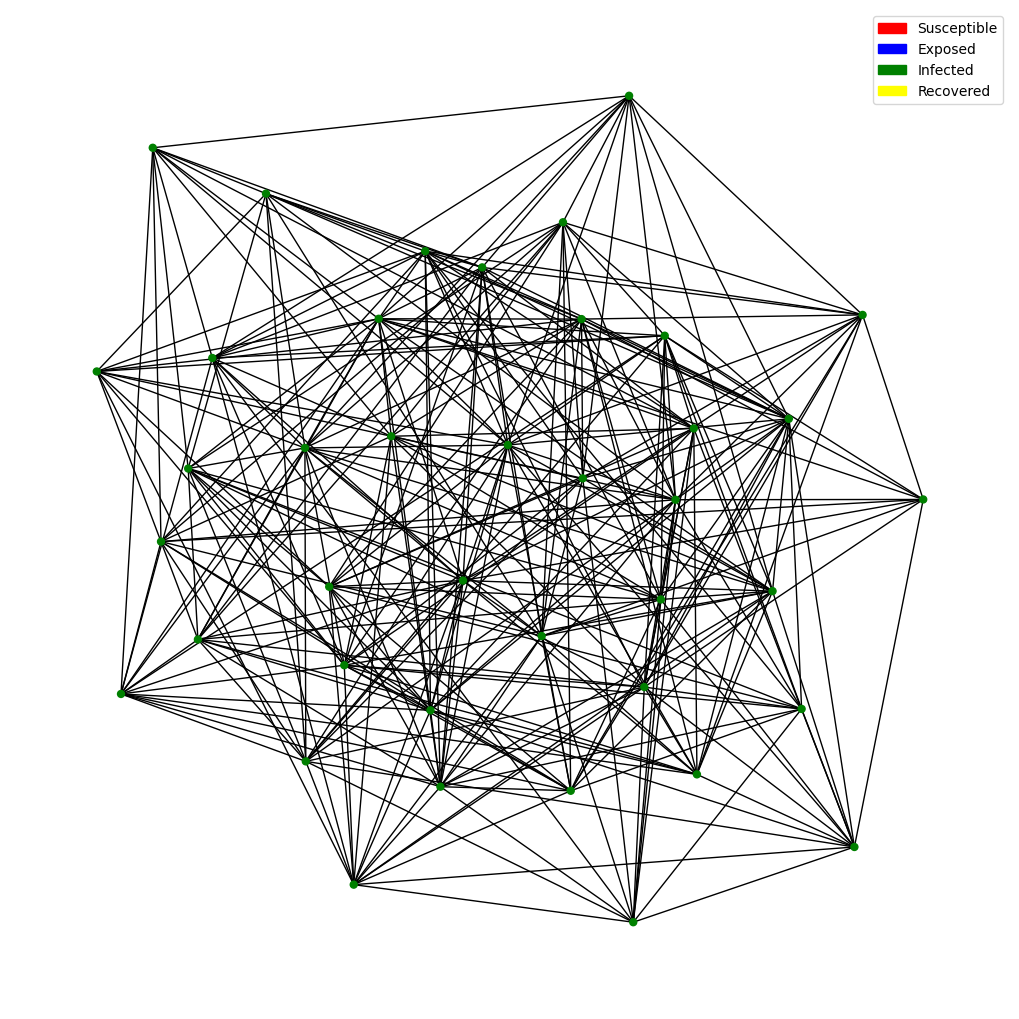

In [931]:
visualization = epilearn.visualize.plot_graph(prediction[0,-1].argmax(-1).cpu().numpy(), 
                                            graph=initial_graph.to_sparse().indices().numpy(),
                                            classes=["Susceptible", "Exposed", "Infected", "Recovered"])

In [932]:
NUM_NODES = 40
CONNECT_PROB = 0.40
LOOKBACK = 60
HORIZON = 20
BATCH_SIZE = 16
INFECTION_RATE = 0.05

In [933]:
NUM_NODES

40

In [934]:
data = data.squeeze()
data.shape

torch.Size([1145, 40, 4])

In [935]:
dataset = epilearn.data.UniversalDataset(x=data[:-1],
                                         y=data[1:])
graph = epilearn.utils.simulation.get_random_graph(num_nodes=NUM_NODES,
                                                connect_prob=CONNECT_PROB)
graph

tensor([[0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 1.],
        ...,
        [1., 0., 1.,  ..., 0., 0., 1.],
        [1., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 1., 0., 0.]])

In [936]:
task = epilearn.tasks.Forecast(prototype=NetSEIRS,
                               lookback=LOOKBACK,
                               horizon=HORIZON,
                               device="cpu")

100%|██████████| 100/100 [04:31<00:00,  2.72s/it]


Final Training loss: 0.0005419792666869844
Final Validation loss: 0.016848590224981308


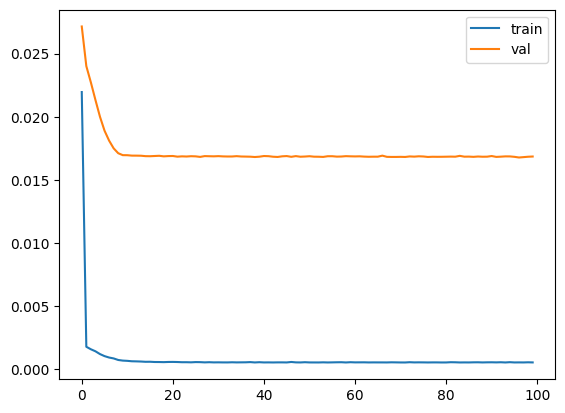

Test MSE: 0.016771065071225166
Test MAE: 0.03669509291648865
Test RMSE: 0.12950314581394196


In [937]:
train_results = task.train_model(
    dataset=dataset,
    model_args={
        "num_nodes": NUM_NODES,
        "num_features": 4,
        "horizon": HORIZON,
        "adj": graph.to("cpu"),
        "infection_rate": INFECTION_RATE,
        "incubation_rate": 1 / INCUBATION_PERIOD,
        "recovery_rate": 1 / INFECTIOUS_PERIOD,
        "immunity_loss_rate": 1 / 14,
        "device": "cpu",
        "batch_size": BATCH_SIZE
    },
    train_rate=0.8,
    val_rate=0.2,
    epochs=100,
    weight_decay=1e-3,
    device="cpu",
    batch_size=BATCH_SIZE
)


# Inference Model

In [938]:
# Get access to the validation portion of the dataset
val_set = task.val_dataset

x_val = val_set['features'].unsqueeze(0)
y_val = val_set['target'].unsqueeze(0)

x_val.shape, y_val.shape

(torch.Size([1, 229, 40, 4]), torch.Size([1, 229, 40, 4]))

In [939]:
# Run accuracy test on validation set
with torch.inference_mode():
    pred = task.model(x_val)

pred_classes = pred.argmax(dim=-1)
true_classes = y_val.argmax(dim=-1)

# get only the number of days from true_classes as specified by HORIZON
true_classes = true_classes[:, :HORIZON, :]

correct = (pred_classes == true_classes).float()
accuracy = correct.mean()

print(f"Validation Accuracy: {accuracy.item() * 100:.2f}%")

Validation Accuracy: 67.12%


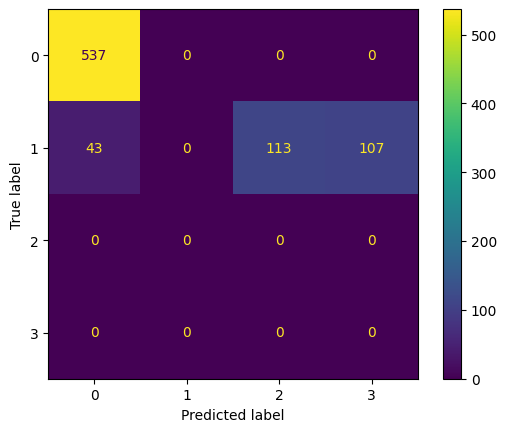

In [940]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred_classes = pred_classes.flatten()
true_classes = true_classes.flatten()

cm = confusion_matrix(true_classes, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap="viridis")

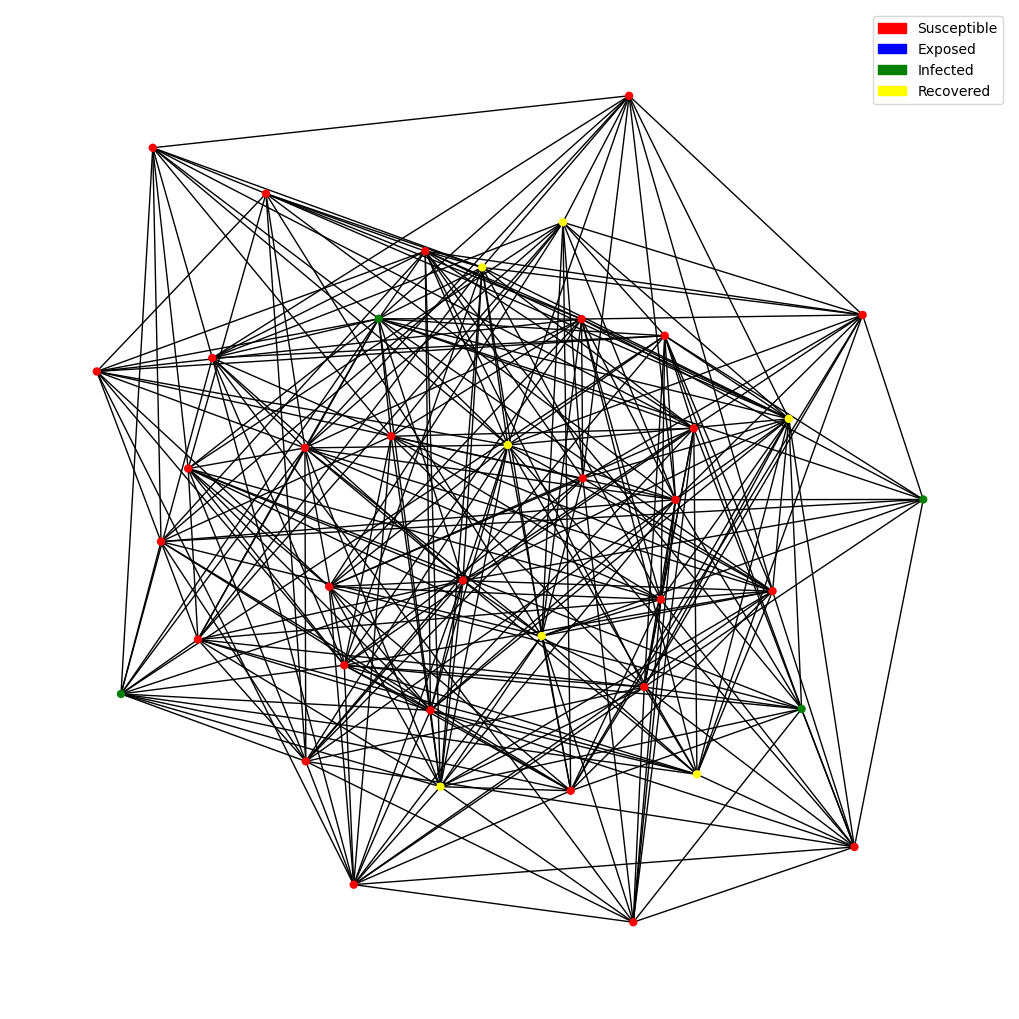

In [943]:
visualization = epilearn.visualize.plot_graph(pred[0,-1].argmax(-1).cpu().numpy(), 
                                            graph=initial_graph.to_sparse().indices().numpy(),
                                            classes=["Susceptible", "Exposed", "Infected", "Recovered"])